<a href="https://colab.research.google.com/github/aadi-kanwar/Twitter-Sentiment-Analysis/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Twitter Sentiment Analysis
Labelled Dataset with 31,962 tweets.

### Import dependencis and required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Load the Dataset

In [2]:
df = pd.read_csv('/content/Twitter Sentiments.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


### Preprocessing the Dataset

In [4]:
# Removes Pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [5]:
# Removing Twitter Handles
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [6]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [7]:
# Removing Special Characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [8]:
# Remove short words like 'a', 'is', etc.
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation


In [9]:
# Tokenization
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

,clean_tweet
0,"[when, father, dysfunctional, selfish, drags, ..."
1,"[thanks, #lyft, credit, can't, cause, they, do..."
2,"[bihday, your, majesty]"
3,"[#model, love, take, with, time, urð±!!!, ð..."
4,"[factsguide:, society, #motivation]"


In [10]:
# Stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

,clean_tweet
0,"[when, father, dysfunct, selfish, drag, kid, i..."
1,"[thank, #lyft, credit, can't, caus, they, don'..."
2,"[bihday, your, majesti]"
3,"[#model, love, take, with, time, urð±!!!, ð..."
4,"[factsguide:, societi, #motiv]"


In [11]:
# Combining into a single string / sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv


### Exploratory Data Analysis

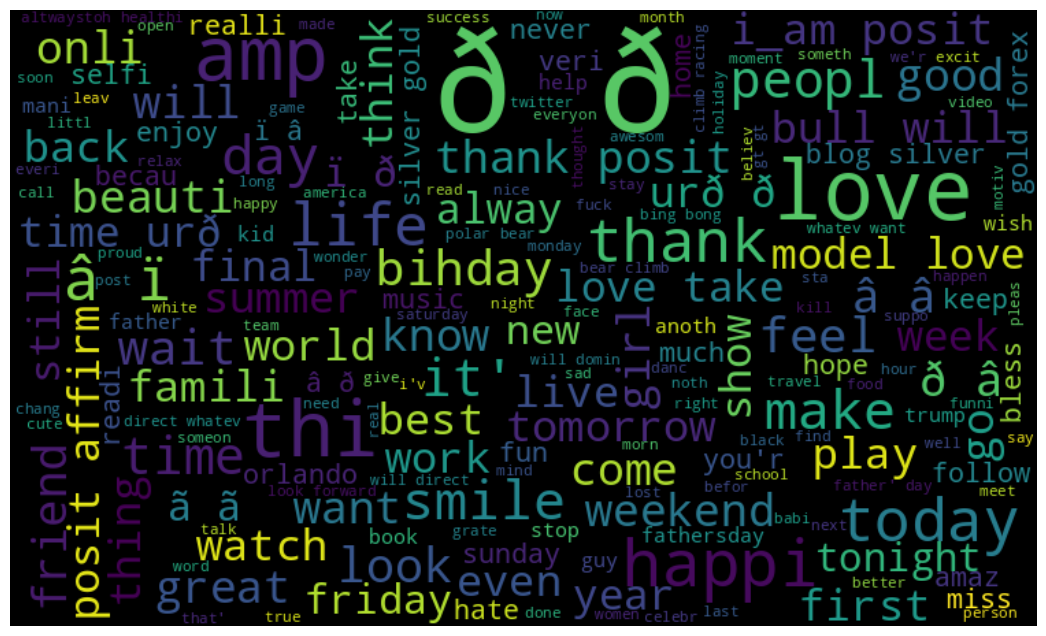

In [12]:
# Visualize frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 750, height = 450, random_state = 42, max_font_size = 100).generate(all_words)

# Plotting of the graph
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

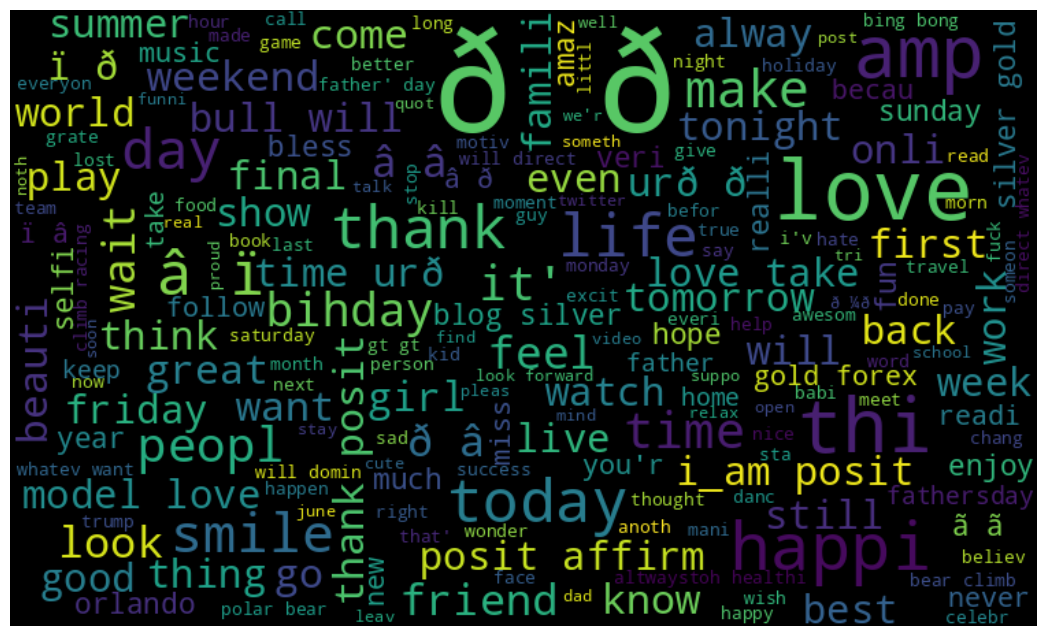

In [13]:
# Frequent words visualization for positive

# Visualize frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width = 750, height = 450, random_state = 42, max_font_size = 100).generate(all_words)

# Plotting of the graph
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

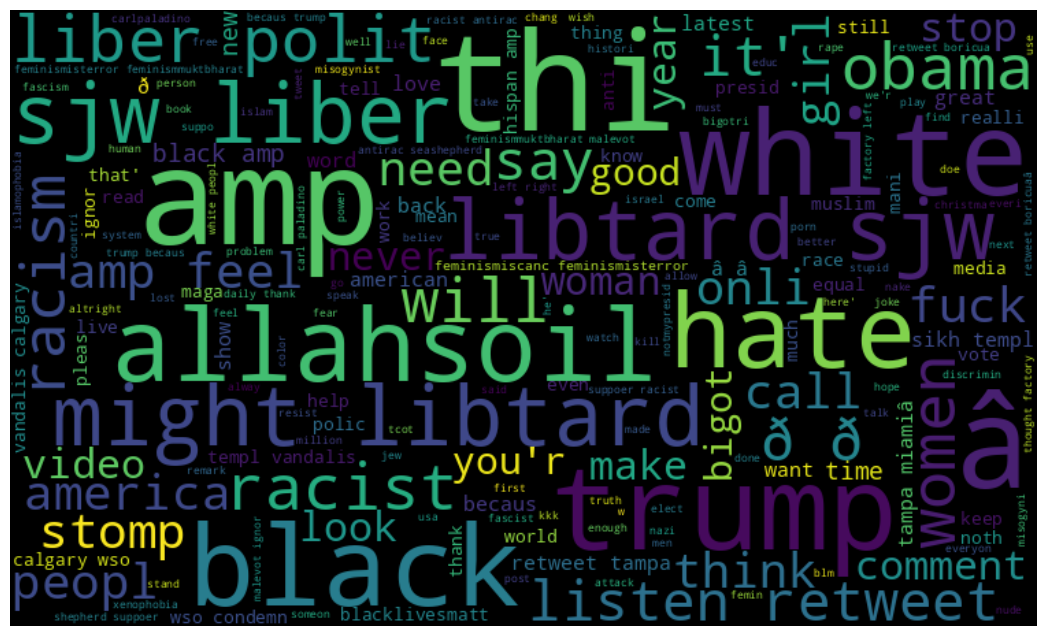

In [14]:
# Frequent words visualization for negative

# Visualize frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width = 750, height = 450, random_state = 42, max_font_size = 100).generate(all_words)

# Plotting of the graph
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [15]:
# Extracting Hashtags
def extract_hashtag(tweets):
    hashtags = []
    # Loop for words in the tweet.
    for tweet in tweets:
        ht = re.findall(r"#(\w+)",tweet)
        hashtags.append(ht)
    return hashtags

In [16]:
# Extracting hashtags from non-racist/non-sexist tweets
ht_postive = extract_hashtag(df['clean_tweet'][df['label']==0])

# Extracting hashtags from racist/non-sexist tweets
ht_negative = extract_hashtag(df['clean_tweet'][df['label']==1])

In [17]:
ht_postive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [18]:
#COnverting to a single list

ht_postive = sum(ht_postive, [])
ht_negative = sum(ht_negative, [])

In [19]:
ht_postive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [20]:
freq = nltk.FreqDist(ht_postive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'count':list(freq.values())})
d.head()

,Hashtag,count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374


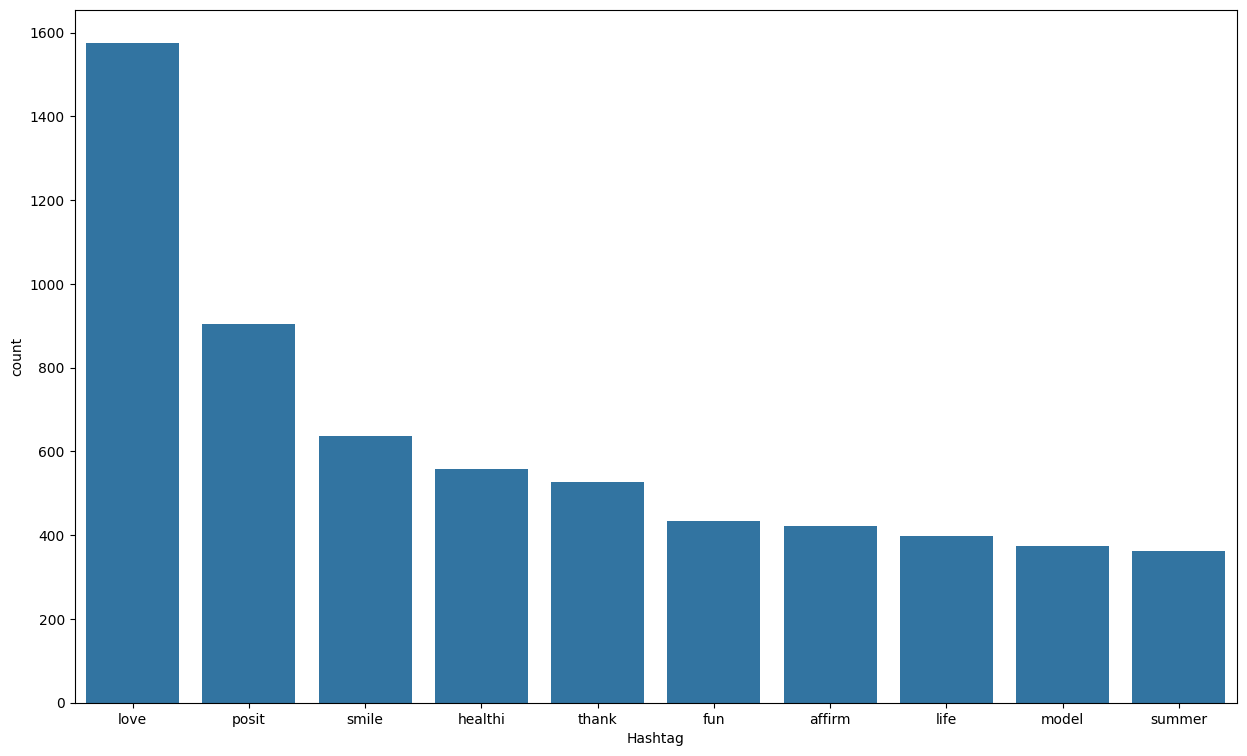

In [21]:
# Select top 10 hashtags
d = d.nlargest(columns = 'count', n = 10)
plt.figure(figsize = (15, 9))
sns.barplot(data = d, x = 'Hashtag', y = 'count')
plt.show()

In [22]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'count':list(freq.values())})
d.head()

,Hashtag,count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2


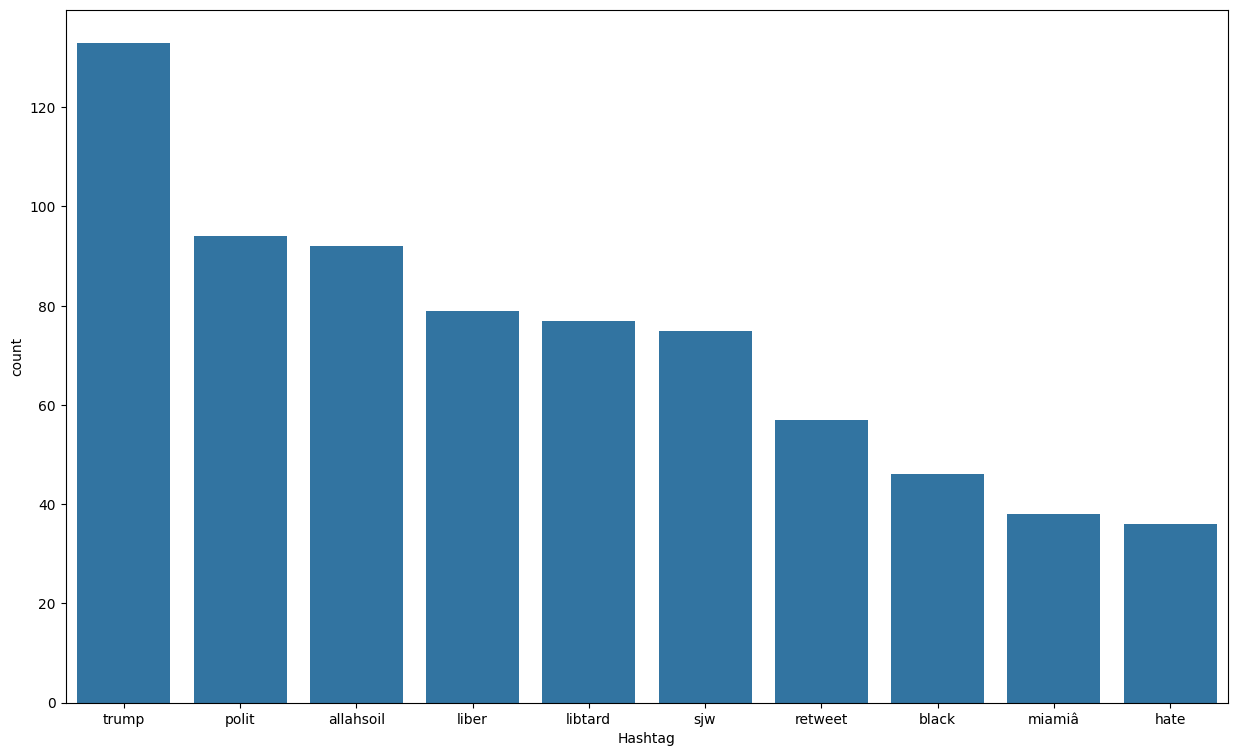

In [23]:
# Select top 10 hashtags
d = d.nlargest(columns = 'count', n = 10)
plt.figure(figsize = (15, 9))
sns.barplot(data = d, x = 'Hashtag', y = 'count')
plt.show()

### Input Split

In [24]:
# Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words = 'english')

bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [28]:
# bow[0].toarray()

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, df['label'],
                                                    random_state = 42,
                                                    test_size = 0.25)

### Model  Training

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [35]:
# Training
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
# Testing
pred = model.predict(X_test)
f1_score(y_test, pred)

0.506508875739645

In [37]:
accuracy_score(y_test, pred)

0.9478162933299963

In [41]:
# Using probability to get output
pred_prob = model.predict_proba(X_test)
pred = pred_prob[:,1] >= 0.3
pred = pred.astype(int)

f1_score(y_test, pred)

0.5575992255566312

In [42]:
accuracy_score(y_test, pred)

0.9428106619947441